In [67]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from scipy.signal import find_peaks
import sympy as sym
import sympy.plotting.plot as symplot

<IPython.core.display.Math object>

<IPython.core.display.Math object>

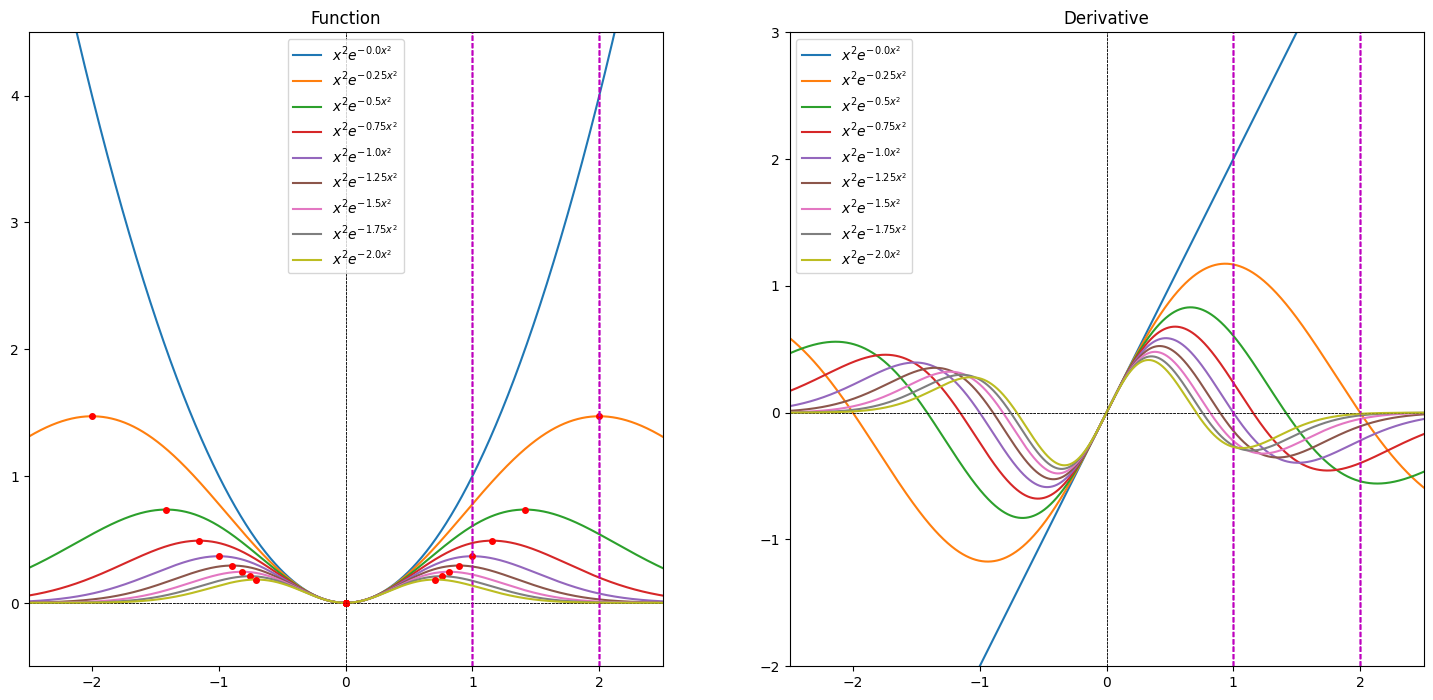

In [65]:
a_params = np.linspace(0, 2, 9) 
for a in a_params:
    x = np.linspace(-3, 3, 10001)
    fx = x**2 * np.exp(-a * x**2)

    dfx = np.diff(fx) / np.diff(x)

    max_points = find_peaks(fx)[0]
    min_points = find_peaks(-fx)[0]
    
    # x_critical = np.concatenate(x[max_points], x[min_points])
    for solution_x in [1, 2]:
        for x_critical_point in x[max_points]:
            accepted_error = 10**-3
            if abs(x_critical_point - solution_x) < accepted_error:
                display(Math('\\Rightarrow x^2e^{-%sx^2} \\text{ has a critical point at x=%s! Woohoo!!}' % (a, solution_x)))
        for x_critical_point in x[min_points]:
            accepted_error = 10**-3
            if abs(x_critical_point - solution_x) < accepted_error:
                display(Math('\\Rightarrow x^2e^{-%sx^2} \\text{ has a critical point at x=%s! Woohoo!!}' % (a, solution_x)))


    plt.subplot(121)
    # functions
    plt.plot(x, fx, label='$x^2e^{-%sx^2}$' % a)

    # critical points
    plt.plot(x[max_points], fx[max_points], 'ro', markersize=4)
    plt.plot(x[min_points], fx[min_points], 'ro', markersize=4)

    # graph design
    plt.axis('square')
    plt.axis([-2.5, 2.5, -0.5, 4.5])
    
    # draw axes
    plt.plot([-2.5, 2.5], [0, 0], 'k--', alpha=0.3, linewidth=0.5)
    plt.plot([0, 0], [-0.5, 4.5], 'k--', alpha=0.3, linewidth=0.5)

    # draw x=1, x=2
    plt.plot([1, 1], [-0.5, 4.5], 'm--', alpha=0.5, linewidth=1)     
    plt.plot([2, 2], [-0.5, 4.5], 'm--', alpha=0.5, linewidth=1)     

    plt.legend()
    plt.title('Function')

    # Derivatives
    plt.subplot(122)

    plt.plot(x[:-1], dfx, label='$x^2e^{-%sx^2}$' % a)
    
    # design
    plt.axis('square')
    plt.axis([-2.5, 2.5, -2, 3])

    # axes
    plt.plot([-2.5, 2.5], [0, 0], 'k--', alpha=0.3, linewidth=0.5)
    plt.plot([0, 0], [-2, 3], 'k--', alpha=0.3, linewidth=0.5)

    # draw x=1, x=2
    plt.plot([1, 1], [-2, 3], 'm--', alpha=0.5, linewidth=1)     
    plt.plot([2, 2], [-2, 3], 'm--', alpha=0.5, linewidth=1)     
    plt.legend()
    plt.title('Derivative')


plt.gcf().set_size_inches(18, 10) 
plt.show()

#### **Now the same thing but with sympy**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

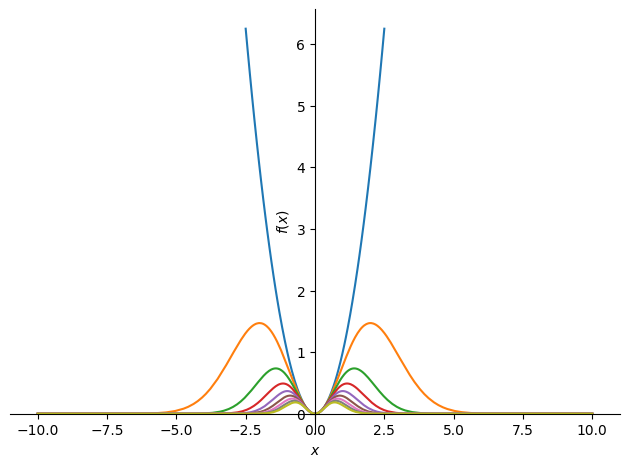

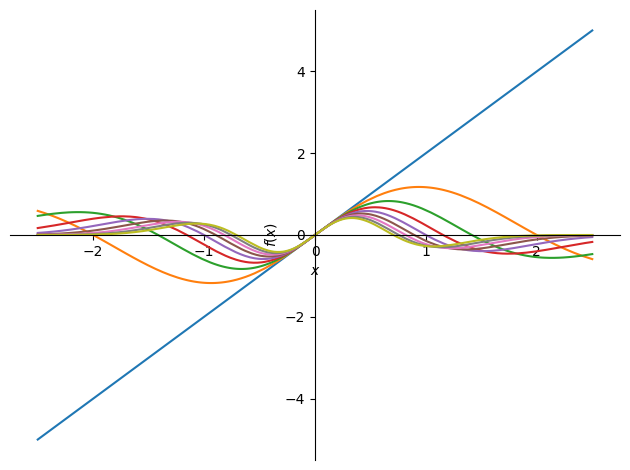

In [123]:
x= sym.symbols('x')
a_param = np.linspace(0, 2, 9)

x_solutions = [1, 2] #what we look for, are there solutions in these points


for idx, a in enumerate(a_param):
    fx = x**2 * sym.exp(-a * x**2)
    dfx = sym.diff(fx)
    solutions = sym.solve(dfx)
    # solutions = [round(el) for el in solutions]
    for solution in solutions:
        for x_solution in x_solutions:
            if abs(x_solution - solution) < 10**-5:
                display(Math(
                    '\\text{Woohoo! }\\qquad f(x):%s \\quad \\Rightarrow \\quad f(x)\'=%s \\text{ , has critical point at } x=%s' %
                    (sym.latex(fx), sym.latex(dfx), x_solution)
            ))
    if idx == 0:
        p = symplot(fx, (x, -2.5, 2.5), show=False)
        dfx_plt = symplot(dfx, (x, -2.5, 2.5), show=False)
    else:
        p.extend(symplot(fx, show=False))
        dfx_plt.extend(symplot(dfx, (x, -2.5, 2.5), show=False))

p.show()
dfx_plt.show()
            

<IPython.core.display.Math object>

<IPython.core.display.Math object>

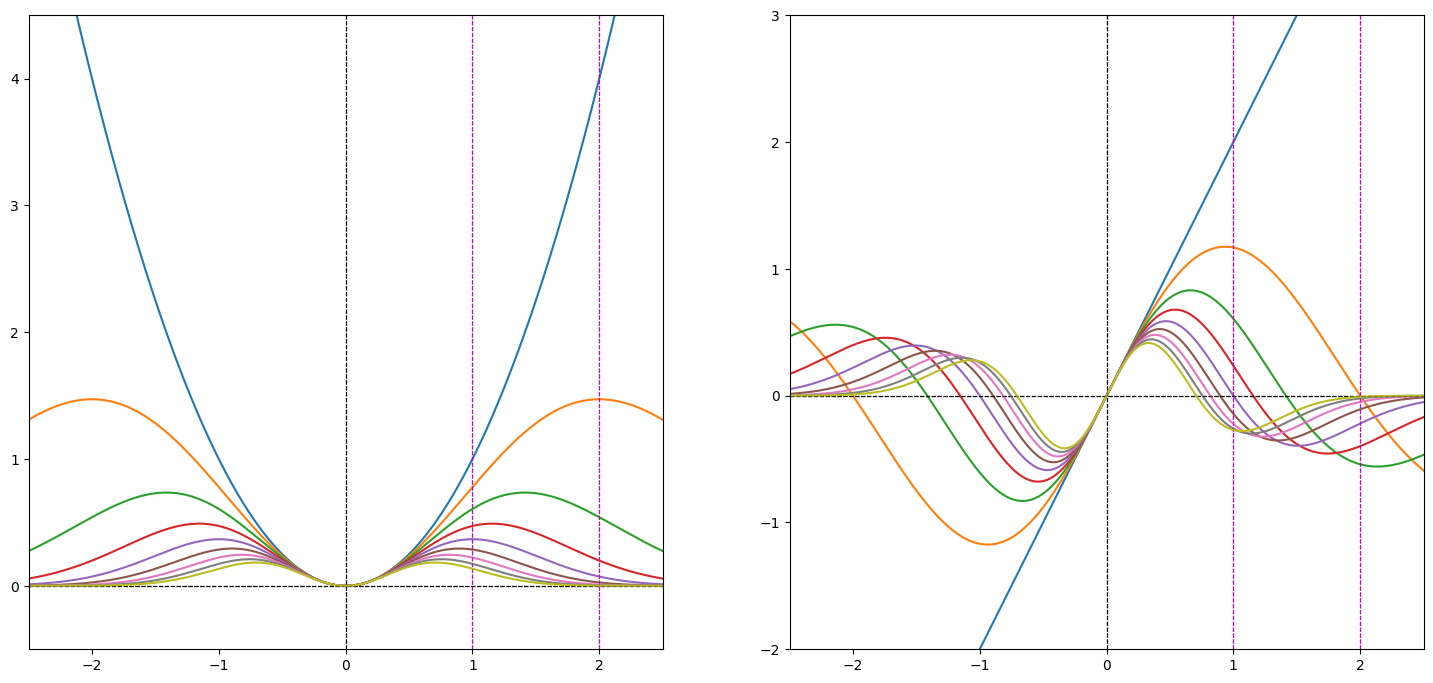

In [132]:
x= sym.symbols('x')
a_param = np.linspace(0, 2, 9)

x_solutions = [1, 2] #what we look for, are there solutions in these points


for idx, a in enumerate(a_param):
    fx = x**2 * sym.exp(-a * x**2)
    dfx = sym.diff(fx)
    solutions = sym.solve(dfx)

    for solution in solutions:
        for x_solution in x_solutions:
            if abs(x_solution - solution) < 10**-5:
                display(Math(
                    '\\text{Woohoo! }\\qquad f(x):%s \\quad \\Rightarrow \\quad f(x)\'=%s \\text{ , has critical point at } x=%s' %
                    (sym.latex(fx), sym.latex(dfx), x_solution)
            ))
    
    # graphing with numpy
    x_val = np.linspace(-3, 3, 1001)
    fx_val = sym.lambdify(x, fx)(x_val)
    dfx_val = sym.lambdify(x, dfx)(x_val)

    plt.subplot(121)
    plt.plot(x_val, fx_val)
    plt.plot([-2.5, 2.5], [0, 0], 'k--', linewidth=0.8, alpha=0.3)
    plt.plot([0, 0], [-0.5, 4.5],  'k--', linewidth=0.8, alpha=0.3)
    plt.plot([1, 1], [-0.5, 4.5], 'm--', linewidth=0.8, alpha=0.3)
    plt.plot([2, 2], [-0.5, 4.5], 'm--', linewidth=0.8, alpha=0.3)

    plt.axis('square')
    plt.axis([-2.5, 2.5, -0.5, 4.5])
    
    plt.subplot(122)
    plt.plot(x_val, dfx_val)
    plt.plot([-2.5, 2.5], [0, 0], 'k--', linewidth=0.8, alpha=0.3)
    plt.plot([0, 0], [-2, 3],  'k--', linewidth=0.8, alpha=0.3)
    plt.plot([1, 1], [-2, 3], 'm--', linewidth=0.8, alpha=0.3)
    plt.plot([2, 2], [-2, 3], 'm--', linewidth=0.8, alpha=0.3)

    plt.axis('square')
    plt.axis([-2.5, 2.5, -2, 3])

plt.gcf().set_size_inches(18, 10)
plt.show()
            

### **How the exercise is solved in the course**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

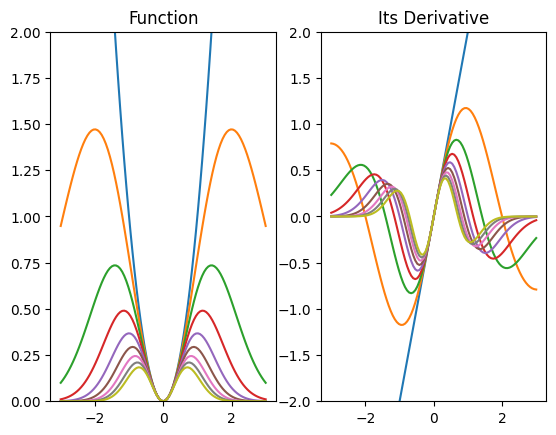

In [147]:
x, a = sym.symbols('x,a')

fx_symbolic = x**2 * sym.exp(-a * x**2)

a_param = np.arange(0, 2.25, 0.25)
x_val = np.linspace(-3, 3, 101)

# setup the fig
fig, ax = plt.subplots(1, 2)

for a_val in a_param:
    fx = fx_symbolic.subs(a, a_val)
    dfx = sym.diff(fx)
    critical_points = sym.solve(dfx)
    if 1 in critical_points:
        display(Math('\\Rightarrow %s \\text{ has a critical point at x=1}' % sym.latex(fx)))
    if 2 in critical_points:
         display(Math('\\Rightarrow %s \\text{ has a critical point at x=2}' % sym.latex(fx)))

    #plotting
    ax[0].plot(x_val, sym.lambdify(x, fx)(x_val))
    ax[1].plot(x_val, sym.lambdify(x, dfx)(x_val))

ax[0].set_ylim([0,2])
ax[1].set_ylim([-2,2])

ax[0].set_title('Function')
ax[1].set_title('Its Derivative')

plt.show()